# 9. Fourier Series and Fourier Transforms

The **Fourier transform** is one of the most important tools in all of mathematics for analyzing the properties of functions.  The basic idea is that an arbitrary function $f(x)$, with a real domain ($x \in \mathbb{R}$), can be expressed as a linear combination of more elementary functions (sinusoidal waves).  Then the coefficients of this linear combination form a counterpart function, $F(k)$, that is defined in a wave-number domain ($k \in \mathbb{R}$).

As it turns out, it's often more useful to deal with $F(k)$ rather than $f(x)$.  In particular, it makes certain mathematical problems, such as differential equations, much easier to solve in the wave-number domain.

## Fourier series<a name="fourier_series"></a>

We begin by discussing the **Fourier series**, which is used to analyze functions which are periodic in their inputs.  A **periodic function** $f(x)$ is a function of a real variable $x$ that repeats itself every time $x$ changes by $a$, as shown in the figure below:

<img src="img/periodicity.png" alt="Schematic of a periodic function.">

The constant $a$ is called the **period**. Mathematically, we write the periodicity condition as

$$f(x+a) = f(x), \;\; \forall\; x\in \mathbb{R}.$$

In a physical context, the value of $f(x)$ can be real or complex.  In either case, we assume that the input $x$ is real.  For instance, $x$ could refer to a spatial coordinate.  (Most of the following discussion can also apply to functions of time, with minor differences in convention that [we'll discuss later](#fourier_time).)

We can also think of a periodic function as being defined over a domain of length $a$, say $-a/2 \le x < a/2$, with **periodic boundary conditions**.  This is like joining the edges of the domain to form a ring of circumference $a$, as shown in the figure below.  The position along the circumference of the ring serves as the $x$ coordinate.

<img src="img/periodic_ring.png" alt="Schematic of a periodic function.">

Consider what it means to "specify" an arbitrary periodic function $f(x)$. One way to specify the function is to state its value for every $-a/2 \le x < a/2$.  But that's an uncountably infinite set of numbers, which is cumbersome to deal with.  A better alternative is to express the function as a linear combination of simpler periodic functions, such as [sines and cosines](#trigonometric):

$$f(x) = \sum_{n=1}^\infty \alpha_n \sin\left(\frac{2\pi n x}{a}\right) + \sum_{m=0}^\infty \beta_m \cos\left(\frac{2 \pi m x}{a}\right).$$

This is called a **Fourier series**. The justification for this formula is that the sine and cosine functions in the series are, themselves, periodic with period $a$:

$$\begin{align}\sin\left(\frac{2\pi n (x+a)}{a}\right) = \sin\left(\frac{2\pi n x}{a} + 2\pi n\right) &= \sin\left(\frac{2\pi n x}{a}\right)\\ \cos\left(\frac{2\pi m (x+a)}{a}\right) = \cos\left(\frac{2\pi m x}{a} + 2\pi m\right) &= \cos\left(\frac{2\pi m x}{a}\right)\end{align}$$

Hence, any such linear combination automatically satisfies the periodicity condition $f(x+a) = f(x)$. (Note that in the Fourier series formula, the sum over $n$ starts from 1, but the sum over $m$ starts from 0; that's because the sine term with $n = 0$ is zero for all $x$, so it's redundant.)

If $f(x)$ can be expressed in the form of a Fourier series, then we can "specify" it by stating the set of numbers $\{\alpha_n, \beta_m\}$, which are called the **Fourier coefficients**.  The Fourier coefficients are real if $f(x)$ is a real function, or complex if $f(x)$ is complex-valued. Once we specify the Fourier coefficients (which is an infinite but discrete set of numbers), then we can determine the value of $f(x)$ for all $x$, just by plugging into the Fourier series formula. Moreover, in many cases of interest, the Fourier coefficients are negligible for large $m$ and $n$ (i.e., for very rapidly-oscillating sine and cosine waves), so we only need to keep track of a small number of low-order coefficients.

### Square-integrable functions<a name="square_integrable"></a>

We said that *if* a periodic function $f(x)$ is expressible as a Fourier series, then the Fourier series is a nice way to specify that function. But under what circumstances can an arbitrary periodic function be expressed as a Fourier series? This question, along with other related issues, preoccupied mathematicians for much of the 19th century; [the full answer](http://en.wikipedia.org/wiki/Convergence_of_Fourier_series) is pretty long and difficult, and beyond the scope of our present discussion.

Luckily, it turns out that most periodic functions encountered in physical contexts can be handled using Fourier series. They are typically part of a class of functions called **square-integrable functions**, which are *guaranteed* to be expressible as Fourier series. Square-integrable functions are those for which the integral

$$\int_{-a/2}^{a/2} dx\; \big|\,f(x)\,\big|^2$$

exists and is finite. For the rest of this course, unless otherwise stated, we will assume that we're dealing with functions of this sort.

### Complex Fourier series and inverse relations<a name="complex_fourier_series"></a>

Using [Euler's formula](#euler_formula), we can re-write the Fourier series as follows:

$$f(x) = \sum_{n=-\infty}^\infty e^{2\pi i n x/a}\, f_n.$$

Instead of separate sums over sine and cosine functions, we sum over complex exponential functions.  We have a new set of Fourier coefficients, $f_n$, and the sum includes negative integers $n$.  This form of the Fourier series is a lot more convenient to work with, since we only have to keep track of a single sum rather than separate sums for the sine and cosine terms.

([As an exercise](#exercises), try working out the explicit relationship between the old $\{\alpha_n, \beta_n\}$ Fourier coefficients and the new $\{f_n\}$ Fourier coefficients.)

From the Fourier series formula, if the Fourier coefficients $\{f_n\}$ are known, then $f(x)$ can be calculated.  The converse is also true: if we are given $f(x)$, it is possible for us to determine the Fourier coefficients. To see how this is done, first observe that

$$\int_{-a/2}^{a/2} dx \; e^{-2\pi i m x/a}\, e^{2\pi i n x/a} = a\, \delta_{mn}\quad \mathrm{for}\;m, n \in \mathbb{Z},$$

where $\delta_{mn}$ is the [Kronecker delta](http://en.wikipedia.org/wiki/Kronecker_delta), defined as:

$$\delta_{mn} = \left\{\begin{array}{ll}1, & \textrm{if}\; m = n\\ 0, & \mathrm{if}\;m\ne n.\end{array}\right.$$

Due to this property, the set of functions $\exp(2\pi i n x / a)$, with integer values of $n$, are said to be **orthogonal** functions.  (We won't go into the details now, but the term "orthogonality" is used here with the same meaning as in vector algebra, where a set of vectors $\vec{v}_1, \vec{v}_2, \dots$ is said to be "orthogonal" if $\vec{v}_m \cdot \vec{v}_n = 0$ for $m\ne n$.)  Using this result, we can show that

$$\begin{align}\int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a} \;f(x)
&= \, \int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a} \left[\sum_{n=-\infty}^\infty e^{2\pi i n x/a}\, f_n\right] \\
&= \sum_{n=-\infty}^\infty \, \int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a}  \, e^{2\pi i n x/a} \;f_n \\
&= \sum_{n=-\infty}^\infty \, a\, \delta_{mn} \, f_n \\
&= a \,f_m.\end{align}$$

The procedure of multiplying by $\exp(-2\pi i m x/a)$ and integrating over $x$ acts as a kind of "sieve", filtering out all other Fourier components of $f(x)$ and keeping only the one with the matching index $m$.  Hence, we arrive at a pair of relations expressing $f(x)$ in terms of its Fourier components, and vice versa:

<table width=75%><tr><td>
$$\left\{\;\;\begin{array}{rl}f(x) &= \displaystyle \, \sum_{n=-\infty}^\infty e^{i k_n x}\, f_n \\ f_n &= \displaystyle\,\frac{1}{a} \int_{-a/2}^{\,a/2} dx\; e^{-i k_n x}\, f(x)\end{array}\;\;\right\} \quad\quad\mathrm{where}\;\; k_n \equiv \frac{2\pi n}{a}$$
</td></tr></table>

The real numbers $k_n$ are called **wave-numbers**.  They form a discrete set, with one for each Fourier component.  In physics jargon, we say that the wave-numbers are "quantized" to integer multiples of $\Delta k \equiv 2\pi/a.$

### Example: Fourier series of a square wave
To get a feel for how the Fourier series expansion works, let's look at the square wave, which is a waveform that takes only two values $+1$ or $-1$, jumping discontinuously between those two values at periodic intervals.  Within one period, the function is

$$f(x) = \left\{\begin{array}{ll}-1, & -a/2 \le x < 0 \\ +1, & \quad\;\;\; 0 \le x < a/2.\end{array}\right.$$

Plugging this into the Fourier relation, and doing the straightforward integrals, gives the Fourier coefficients

$$\begin{aligned} f_n &= -i \, \frac{\left[\sin\left(n \pi/2\right)\right]^2}{n\pi/2 } \\ &= \left\{\begin{array}{cl} -2i/n\pi ,& n \; \mathrm{odd} \\ 0,& n \; \mathrm{even}. \\\end{array}\right.\end{aligned}$$

As can be seen, the high-frequency Fourier components are less important, since the Fourier coefficients go to zero for large $n$.  We can write the Fourier series as

$$f(x) \; \leftrightarrow \; \sum_{n=1,3,5,\dots} \frac{4\sin(2\pi n x / a)}{n \pi}.$$

If this infinite series is truncated to a finite number of terms, we get an approximation to $f(x)$.  As shown in the figure below, the approximation becomes better and better as more terms are included.

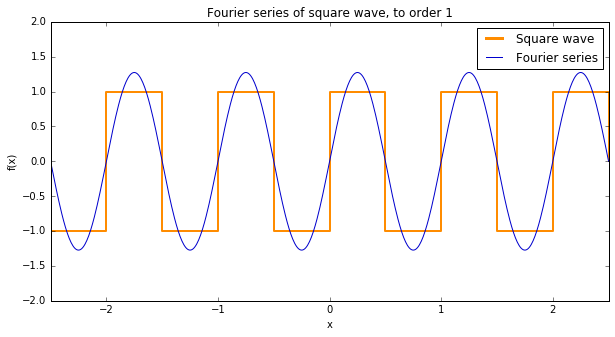

In [25]:
%matplotlib inline
from ipywidgets import interact, IntSlider, FloatSlider
from numpy import linspace, sin, pi, zeros, array
import matplotlib.pyplot as plt

def plot_square_wave_series(N, a):
    np = 2                                # Number of periods to plot on each side of x = 0
    xmin, xmax = (-np-0.5)*a, (np+0.5)*a  # x-axis limits of the plot
    ymin, ymax = -2.0, 2.0                # y-axis limits of the plot
    nx = 600                              # Number of x-points in the Fourier series plot
    col0, col1, col2 = "grey", "darkorange", "mediumblue"

    plt.figure(figsize=(10,5))
    ## Plot the square wave
    plt.plot([], [], linewidth=3, color=col1, label="Square wave")
    for n in range(-np, np+1):
        x = array([-0.5*a, -0.5*a, 0.0, 0.0, 0.5*a, 0.5*a])
        y = array([0.0, -1.0, -1.0, 1.0, 1.0, 0.0])
        plt.plot(x-n*a, y, linewidth=2, color=col1)
        
    ## Plot the Fourier series approximant.
    x = linspace(xmin, xmax, nx)
    f = zeros(nx)
    for n in range(1,N+1,2):
        f += (4.0/n/pi) * sin(2*pi*n*x/a)
    plt.plot(x, f, linewidth=1, color=col2, label="Fourier series")
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Fourier series of square wave, to order {}'.format(N)) 
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.legend(loc="upper right")

interact(plot_square_wave_series,
         N = IntSlider(min=1, max=25, step=2, value=1, description='n_max'),
         a = FloatSlider(min=0.5, max=4.0, step=0.1, value=1.0, description='a'));

One amusing consequence of this result is that it can be used as a series expansion for the mathematical constant $\pi$.  If we set $x = a/4$, then

$$f(a/4) = 1 = \frac{4}{\pi} \left[\sin(\pi/2) + \frac{1}{3}\sin(3\pi/2) + \frac{1}{5}\sin(5\pi/2) + \cdots\right],$$

and hence

$$\pi = 4 \left(1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots\right).$$

## Fourier transforms<a name="fourier_transform"></a>

The Fourier series discussed in the [previous section](#fourier_series) applies to periodic functions, $f(x)$, defined over the interval $-a/2 \le x < a/2$.  This concept can be generalized to functions defined over the entire real line, $x \in \mathbb{R}$, by carefully taking the limit $a \rightarrow \infty$.

Consider what happens when we apply the $a \rightarrow \infty$ limit to the right-hand side of the [complex Fourier series formula](#complex_fourier_series):

$$f(x) = \lim_{a\rightarrow \infty} \left( \sum_{n=-\infty}^\infty e^{i k_n x}\, f_n\right), \quad\mathrm{where}\;\; k_n = n\Delta k, \;\; \Delta k = \frac{2\pi}{a}.$$

As $a \rightarrow \infty$, the wave-number quantum $\Delta k$ goes to zero.  Hence, the set of values of $k_n$ turns into a continuum, and we can replace the discrete sum with an integral over the values of $k_n$.  To do this, we multiply the summand by a factor of $(\Delta k/2\pi) / (\Delta k/2\pi) = 1$:

$$f(x) = \lim_{a\rightarrow \infty} \left[\;\,\sum_{n=-\infty}^\infty \frac{\Delta k}{2\pi} \, e^{i k_n x}\, \left(\frac{2\pi f_n}{\Delta k} \right)\;\,\right].$$

If we now define

$$F(k_n) \equiv \frac{2\pi}{\Delta k}\,f_n,$$

then the sum becomes

$$f(x) = \lim_{a\rightarrow \infty} \left( \sum_{n=-\infty}^\infty \frac{\Delta k}{2\pi} \, e^{i k_n x}\, F(k_n)\right).$$

This limiting expression matches the basic definition of an [integral](02_integrals.ipynb):

$$f(x) = \int_{-\infty}^{\infty} \frac{dk}{2\pi} \, e^{i k x}\, F(k).$$

In case you're wondering, the factor of $2\pi$ is essentially arbitrary, and is just a matter of how we chose to define $F(k_n)$. Our choice corresponds to the standard definition of the Fourier transform.

### The Fourier relations<a name="fourier_rels"></a>

The function $F(k)$ defined in the [previous section](#fourier_transform) is called the **Fourier transform** of $f(x)$.  Just as we have expressed $f(x)$ in terms of $F(k)$, we can also express $F(k)$ in terms of $f(x)$.  To do this, we apply the $a \rightarrow \infty$ limit to the [inverse relation for the Fourier series](#complex_fourier_series):

$$\begin{align}F(k_n) &= \lim_{a\rightarrow \infty} \frac{2 \pi}{\Delta k}\, f_n \\
 &= \lim_{a\rightarrow \infty} \frac{2 \pi}{2\pi/a}\, \left(\frac{1}{a} \int_{-a/2}^{a/2} dx\; e^{-i k_n x}\right) \\
 &= \int_{-\infty}^\infty dx\; e^{-i kx}\, f(x).\end{align}$$

Hence, we arrive at a pair of equations called the **Fourier relations**:

<table width=75%><tr><td>
$$\left\{\;\;\begin{align}F(k) &= \;\int_{-\infty}^\infty dx\; e^{-ikx}\, f(x) \\ f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi}\; e^{ikx}\, F(k)\end{align}\;\;\right\}$$
</td></tr></table>

The first equation is the Fourier transform, and the second equation is called the **inverse Fourier transform**.  These relations state that if we have a function $f(x)$ defined over $x \in \mathbb{R}$, then there is a unique counterpart function $F(k)$ defined over $k \in \mathbb{R}$, and vice versa.  The Fourier transform converts $f(x)$ to $F(k)$, and the inverse Fourier transform does the reverse.

It is important to note the small differences between the two formulas.  Firstly, there is a factor of $1/2\pi$ that "tags along" with $dk$, but not with $dx$; this is a matter of convention, tied to our definition of $F(k)$, as mentioned before.  Secondly, the integral over $x$ contains a factor of $e^{-ikx}$ but the integral over $k$ contains a factor of $e^{ikx}$. One way to remember this is to think of the integral over $k$, in the inverse Fourier transform equation, as the continuum limit of a sum over complex waves, with $F(k)$ playing the role of the series coefficients; [by convention](05_complex_waves.ipynb), these complex waves have the form $\exp(ikx)$.

In our definition of the Fourier transform, it is clear that the Fourier series needs to remain convergent as we take the $a \rightarrow \infty$ limit. Based on [previous discussion of square-integrable functions](#square_integrable), this means we are always dealing with functions such that

$$\int_{-\infty}^{\infty} dx\; \big|\,f(x)\,\big|^2$$

exists and is finite.

### A simple example<a name="simple_example"></a>

Consider the function

$$f(x) = \left\{\begin{array}{cl}e^{-\eta x}, & x \ge 0 \\ 0, & x < 0,\end{array}\right. \qquad \eta \in \mathbb{R}^+.$$

For $x < 0$, this is an exponentially-decaying function, and for $x < 0$ it is identically zero. The real parameter $\eta$ is called the decay constant; for $\eta > 0$, the function $f(x)$ vanishes as $x \rightarrow +\infty$ and can thus be shown to be square-integrable, and larger values of $\eta$ correspond to faster exponential decay.

The Fourier transform can be found by directly calculating the Fourier integral:

$$F(k) \;=\; \;\int_{0}^\infty dx\; e^{-i kx}\, e^{-\kappa x} \;=\; \frac{-i}{k - i \eta}.$$

It is useful to plot the squared magnitude of the Fourier transform, $|F(k)|^2$, against $k$.  This is called the **Fourier spectrum** of $f(x)$.  In this case,

$$\big|\,F(k)\,\big|^2 = \frac{1}{k^2 + \eta^2}.$$

This Fourier spectrum is plotted in the figure below.  This kind of graph is called a **Lorentzian** curve, and it consists of a peak centered at $k = 0$, whose height and width are dependent on the decay constant $\eta$.  For small $\eta$, i.e. weakly-decaying $f(x)$, the peak is high and narrow.  For large $\eta$, i.e. rapidly-decaying $f(x)$, the peak is low and broad.  This kind of relationship between the decay rate and the Fourier spectrum peak width is very common.

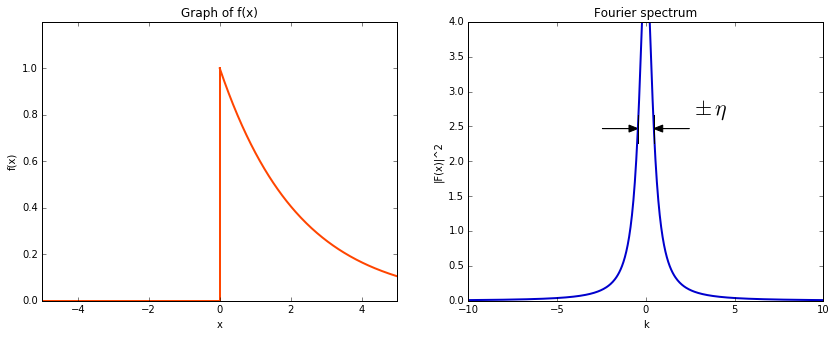

In [20]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp, pi, zeros
import matplotlib.pyplot as plt

def plot_exp_fourier(eta):
    ## Plotting parameters
    xmin, xmax = -5., 5.
    fmin, fmax = 0, 1.2
    kmin, kmax = -10., 10.
    Fsqmin, Fsqmax = 0, 4
    nx, nk = 200, 500
    arrowdx, arrowy, bardy = 2, 2, 0.2
    col0, col1, col2 = "black", "orangered", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ## For x < 0, f(x) = 0:
    plt.plot([xmin, 0, 0], [0, 0, 1], linewidth=2, color=col1)
    ## For x > 0, f(x) = exp(-eta*x):
    x = linspace(0, xmax, nx)
    f = exp(-eta*x)
    plt.plot(x, f, linewidth=2, color=col1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Graph of f(x)')
    plt.xlim(xmin, xmax)
    plt.ylim(fmin, fmax)
    
    ## Plot Fourier spectrum using exact formula given in notes:
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = -1j/(k-1j*eta)
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)

    ## Plot some arrow guides
    y0 = 0.5/eta**2 # Half-maximum
    plt.arrow(-eta-arrowdx, y0,  arrowdx, 0, color=col0, head_width=0.1, head_length=0.5, length_includes_head=True)
    plt.arrow(+eta+arrowdx, y0, -arrowdx, 0, color=col0, head_width=0.1, head_length=0.5, length_includes_head=True)
    plt.plot([-eta, -eta], [y0-bardy, y0+bardy], color=col0)
    plt.plot([ eta,  eta], [y0-bardy, y0+bardy], color=col0)
    plt.text(eta + arrowdx + 0.25, y0+bardy, r"$\pm\,\eta$", fontsize=22)

    ## Axis labels, etc.
    plt.xlabel('k')
    plt.ylabel('|F(x)|^2')
    plt.title('Fourier spectrum')
    plt.xlim(kmin, kmax)
    plt.ylim(Fsqmin, Fsqmax)

interact(plot_exp_fourier,
         eta = FloatSlider(min=0.4, max=2.0, step=0.05, value=1.0, description='eta'));

We can quantify the width of the Lorentzian curve by defining the **full-width at half-maximum** (FWHM), which is the width of the curve at half the value of its maximum.  In this case, the maximum of the Lorentzian curve occurs at $k=0$ and has the value of $1/\eta^2$.  The half-maximum, $1/2\eta^2$, occurs when $\delta k = \pm \eta$.  Hence, the original function's decay constant, $\eta$, is directly proportional to the FWHM of the Fourier spectrum, which is $2\eta$.

Note also that this relationship is dimensionally consistent. In $f(x)$, the exponent $\eta x$ needs to be dimensionless, so the decay constant has unit of $[1/x]$.  This has the same units as the wave-number variable $k$, which is the horizontal axis for the Fourier spectrum.

To wrap up this example, let's evaluate the inverse Fourier transform:

$$f(x) \; = \; -i\int_{-\infty}^\infty \frac{dk}{2\pi} \; \frac{e^{i kx}}{k-i\eta}.$$

This can be done by [contour integration](08_contour_integration.ipynb).  The analytic continuation of the integrand has one simple pole, at $k = i\eta$.  For $x < 0$, the numerator $\exp(ikx)$ blows up far from the origin in the upper half of the complex plane, and vanishes far from the origin in the lower half-plane; hence we close the contour in the lower half-plane.  This encloses no pole, so the integral is zero.  For $x > 0$, the numerator vanishes far from the origin in the upper half-plane, so we close the contour in the upper half-plane (i.e., the contour is counter-clockwise).  Hence,

$$f(x) = \left(\frac{-i}{2\pi}\right) \, \left(2\pi i\right) \, \mathrm{Res}\left[ \frac{e^{ikx}}{k-i\eta}\right]_{k=i\eta} = e^{-\eta x} \qquad(x > 0)$$

which is indeed the function that we started out with.

### Fourier transforms for time-domain functions<a name="fourier_time"></a>

So far, we have been dealing with functions of a spatial coordinate $x$.  Of course, these mathematical relations don't care about what kind of variable we are dealing with, so the Fourier transform concept can also be applied to functions of time $t$. However, there is a vexatious difference in convention that needs to be observed: when dealing with functions of the time coordinate $t$, it is customary to use a different sign convention in the Fourier relations!

The Fourier relations for a function of time, $f(t)$, are:

<table width=75%><tr><td>
$$\left\{\;\,\begin{align}F(\omega) &= \;\int_{-\infty}^\infty dt\; e^{i\omega t}\, f(t) \\ f(t) &= \int_{-\infty}^\infty \frac{d\omega}{2\pi}\; e^{-i\omega t}\, F(\omega).\end{align}\;\,\right\}$$
</td></tr></table>

These relations differ in one notable way from the [previously-derived Fourier relations](#fourier_rels) between $f(x)$ and $F(k)$: the signs of the $\pm i \omega t$ exponents are flipped.

There's a good reason for this difference in sign convention: it arises from the need to describe propagating waves, which vary with both space *and* time.  As we have previously discussed, a propagating plane wave can be described by a [wavefunction](05_complex_waves.ipynb):

$$f(x,t) = A e^{i(kx - \omega t)},$$

where $k$ is the wave-number and $\omega$ is the frequency.  We write the plane wave function this way so that positive $k$ indicates forward propagation in space (i.e., in the $+x$ direction), and positive $\omega$ indicates forward propagation in time (i.e., in the $+t$ direction).  This requires the $kx$ and $\omega t$ terms in the exponent to have opposite signs, so that when $t$ increases by a certain amount, a corresponding *increase* in $x$ leaves the total exponent unchanged.

Now, as we have seen, the inverse Fourier transform relation describes how a wave-form is broken up into a superposition of elementary waves.  In the case of a wavefunction $f(x,t)$, the superposition is given in terms of plane waves:

$$f(x,t) = \int_{-\infty}^\infty \frac{dk}{2\pi} \int_{-\infty}^\infty \frac{d\omega}{2\pi}\;\; e^{i(kx-\omega t)}\, F(k,\omega).$$

To be consistent with this, we need to treat space and time variables with oppositely-signed exponents:

$$\begin{align}f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi}\; e^{ikx}\, F(k) \\ f(t) &= \int_{-\infty}^\infty \frac{d\omega}{2\pi}\; e^{-i\omega t}\, F(\omega).\end{align}$$

The other set of Fourier relations follow from this choice.

### Basic properties of the Fourier transform<a name="basic_props"></a>

The Fourier transform has several properties that are useful to remember.  These can all be directly proven using the definition of the Fourier transform, and these proofs are left as exercises.

<ol><li>The Fourier transform is a linear operation: if we have two functions $f(x)$ and $g(x)$, whose Fourier transforms are $F(k)$ and $G(k)$ respectively, then for any constants $a, b \in \mathbb{C}$, $$a f(x) + b g(x) \;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; a F(k) + b G(k)$$
</li>
<li>Performing a coordinate translation on a function causes its Fourier transform to be multiplied by a "phase factor":
$$f(x+b) \;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; e^{ikb} \, F(k).$$ As a consequence, translations leave the [Fourier spectrum](#simple_example) $|F(k)|^2$ unchanged.</li>
<li>If the Fourier transform of $f(x)$ is $F(k)$, then
$$f^*(x) \quad  \overset{\mathrm{FT}}{\longrightarrow} \;\; F^*(-k).$$ As a consequence, the Fourier transform of a real function must satisfy the symmetry relation $F(k) = F^*(-k)$, meaning that the Fourier spectrum is symmetric about the origin in k-space: $\big|\,F(k)\,\big|^2 = \big|\,F(-k)\,\big|^2.$</li>
<li>When you take the derivative of a function, that is equivalent to multiplying its Fourier transform by a factor of $ik$:
$$\frac{d}{dx} f(x) \,\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; ik F(k).$$ For functions of time, because of the [difference in sign convention discussed above](#fourier_time), there is an extra minus sign:
$$\frac{d}{dt} f(t) \;\;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; -i\omega F(\omega).$$
</li>
</ol>

### Fourier transforms of differential equations

The Fourier transform can be a very useful tool for solving [differential equations](01_derivatives.ipynb#ODE).  As an example, consider a [damped harmonic oscillator](04_complex_oscillations.ipynb) that is subjected to an additional driving force $f(t)$.  This force has an arbitrary time dependence, and is not necessarily harmonic.  The equation of motion is

$$\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) = \frac{f(t)}{m}.$$

To solve for $x(t)$, we first take the Fourier transform of both sides of the above equation.  The result is:

$$- \omega^2 X(\omega) - 2 i\gamma \omega X(\omega) + \omega_0^2 X(\omega) = \frac{F(\omega)}{m},$$

where $X(\omega)$ and $F(\omega)$ are the Fourier transforms of $x(t)$ and $f(t)$ respectively. To obtain the left-hand side of this equation, we made use of the [properties of the Fourier transform described in the previous section](#basic_props), specifically linearity (1) and Fourier transformations of derivatives (4).  Note also that we have used the sign convention for time-domain functions [discussed earlier](#fourier_time).

Notice that the Fourier transform has turned our ordinary differential equation into an algebraic equation.  This equation can be easily solved:

$$X(\omega) = \frac{F(\omega)/m}{- \omega^2 - 2 i\gamma \omega + \omega_0^2}$$

Knowing $X(\omega)$, we can use the inverse Fourier transform to obtain $x(t)$:

$$x(t) = \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, \frac{e^{-i\omega t}\, F(\omega)/m}{- \omega^2 - 2 i\gamma \omega + \omega_0^2}, \;\; \mathrm{where}\;\; F(\omega) = \int_{-\infty}^\infty dt\; e^{i\omega t} f(t).$$

To summarize, the solution procedure for the driven harmonic oscillator equation consists of (i) using the Fourier transform on $f(t)$ to obtain $F(\omega)$, (ii) using the above equation to find $X(\omega)$ algebraically, and (iii) performing an inverse Fourier transform to obtain $x(t)$.  This is the basis for the [Green's function method](10_greens_function.ipynb), a method for systematically solving differential equations that will be discussed later.

## Common Fourier transforms

To accumulate more intuition about Fourier transforms, we will now study the Fourier transforms of a few interesting functions.  We will simply state the results, leaving the actual calculations of the Fourier transforms as exercises.

### Damped waves

[Previously](#simple_example), we saw that an exponentially decay function with decay constant $\eta \in \mathbb{R}^+$ has the following Fourier transform:

$$f(x) = \left\{\begin{array}{cl}e^{-\eta x}, & x \ge 0 \\ 0, & x < 0,\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{-i}{k-i\eta}.$$

Observe that $F(k)$ is given by a simple algebraic formula. If we "extend" the domain of $k$ to complex values, $F(k)$ corresponds to an analytic function with a [simple pole](08_contour_integration.ipynb#poles) in the upper half of the complex plane, at $k = i\eta$.

Next, consider a decaying wave with wave-number $q \in \mathbb{R}$ and decay constant $\eta \in \mathbb{R}^+$. The Fourier transform is a function with a simple pole at $q + i \eta$:

$$f(x) = \left\{\begin{array}{cl}e^{i (q + i\eta) x}, & x \ge 0 \\ 0, & x < 0.\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{-i}{k-(q + i\eta)}.$$

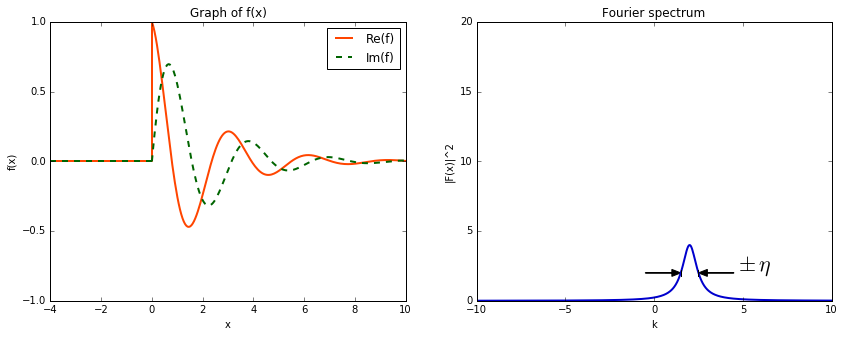

In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp, pi, zeros
import matplotlib.pyplot as plt

def plot_exp_fourier_1(q, eta):
    ## Plot parameters:
    xmin, xmax = -4., 10.
    fmin, fmax = -1., 1.
    kmin, kmax = -10., 10.
    Fsqmin, Fsqmax = 0, 20
    nx, nk = 200, 500
    arrowdx, arrowy, bardy = 2, 2, 0.2
    col0, col1a, col1b, col2 = "black", "orangered", "darkgreen", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ## For x < 0, f(x) = 0:
    plt.plot([xmin, 0, 0], [0, 0, 1], '-',  linewidth=2, color=col1a, label='Re(f)')
    plt.plot([xmin, 0],    [0, 0],    '--', linewidth=2, color=col1b, label='Im(f)')
    ## For x > 0, f(x) = exp(i(q+i*eta)*x)
    x = linspace(0, xmax, nx)
    f = exp(1j * (q + 1j*eta) * x)
    plt.plot(x, f.real, '-',  linewidth=2, color=col1a) # Plot the real part of f(x)
    plt.plot(x, f.imag, '--', linewidth=2, color=col1b) # Plot imaginary part (in same graph)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Graph of f(x)')
    plt.xlim(xmin, xmax)
    plt.ylim(fmin, fmax)
    plt.legend(loc="upper right")
    
    ## Plot the Fourier spectrum (using exact formula)
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = -1j/(k-(q+1j*eta))
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)
    ## Guides to the eye for eta
    y0 = 0.5/eta**2 # Half-maximum
    plt.arrow(q-eta-arrowdx, y0,  arrowdx, 0, color=col0, head_width=0.5, head_length=0.5, length_includes_head=True)
    plt.arrow(q+eta+arrowdx, y0, -arrowdx, 0, color=col0, head_width=0.5, head_length=0.5, length_includes_head=True)
    plt.plot([q-eta, q-eta], [y0-bardy, y0+bardy], color=col0)
    plt.plot([q+eta, q+eta], [y0-bardy, y0+bardy], color=col0)
    plt.text(q + eta + arrowdx + 0.25, y0+bardy, r"$\pm\,\eta$", fontsize=22)
    plt.xlabel('k')
    plt.ylabel('|F(x)|^2')
    plt.title('Fourier spectrum')
    plt.xlim(kmin, kmax)
    plt.ylim(Fsqmin, Fsqmax)

interact(plot_exp_fourier_1,
         q   = FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='q'),
         eta = FloatSlider(min=0.2,  max=1.0, step=0.05, value=0.5, description='eta'));

On the other hand, consider a wave that grows exponentially with $x$ for $x < 0$, and is zero for $x > 0$. The Fourier transform is a function with a simple pole in the lower half-plane:

$$f(x) = \left\{\begin{array}{cl}0, & x \ge 0 \\ e^{i (q - i\eta) x}, & x < 0.\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{i}{k-(q - i\eta)}.$$

From these examples, we see that oscillations and amplification/decay in $f(x)$ are related to the existence of poles in the algebraic expression for $F(k)$. The real part of the pole position gives the wave-number of the oscillation, and the distance from the pole to the real axis gives the amplification or decay constant.  A decaying signal produces a pole in the upper half-plane, while a signal that is increasing exponentially with $x$ produces a pole in the lower half-plane. In both cases, if we plot the Fourier spectrum of $|F(k)|^2$ versus real $k$, the result is a [Lorentzian](#simple_example) peak centered at $k = q$, with width $2\eta$.

### Gaussian wave-packets<a name="gaussian_FT"></a>

It is also interesting to look at the Fourier transform of a function that decays faster than an exponential. In particular, let's consider a function with a decay envelope given by a [Gaussian function](02_integrals.ipynb#gaussian_integral):

$$f(x) = e^{iq x} \, e^{-\gamma x^2}, \;\;\;\mathrm{where}\; q \in \mathbb{C},\; \gamma \in \mathbb{R}.$$

Such a function is called a **Gaussian wave-packet**. The width of the Gaussian envelope is usually characterized by the Gaussian function's **standard deviation**, which is where the curve reaches $e^{-1/2}$ times its peak value.  In this case, the standard deviation is $\Delta x = 1/\sqrt{2\gamma}$.

It can be shown that $f(x)$ has the following Fourier transform:

$$F(k) = \sqrt{\frac{\pi}{\gamma}} \, e^{-\frac{(k-q)^2}{4\gamma}}.$$

To derive this result, we perform the Fourier integral as follows:

$$\begin{align}F(k) &= \int_{-\infty}^\infty dx \, e^{-ikx}\, f(x) \\ &= \int_{-\infty}^\infty dx \, \exp\left\{-i(k-q)x -\gamma x^2\right\}.\end{align}$$

In the integrand, the expression inside the exponential is quadratic in $x$.  We complete the square:

$$\begin{align}F(k) &= \int_{-\infty}^\infty dx \, \exp\left\{-\gamma\left(x + \frac{i(k-q)}{2\gamma}\right)^2 + \gamma\left(\frac{i(k-q)}{2\gamma}\right)^2\right\} \\
&= \exp\left\{ - \frac{(k-q)^2}{4\gamma}\right\}\; \int_{-\infty}^\infty dx \, \exp\left\{-\gamma\left(x + \frac{i(k-q)}{2\gamma}\right)^2\right\}
 \end{align}.$$

The remaining integral is simply the [Gaussian integral](02_integrals.ipynb#gaussian_integral), with a constant shift in $x$ which can be eliminated by a change of variables.  This yields the result stated above.

The Fourier spectrum, $|F(k)|^2$, is a Gaussian function with standard deviation 

$$\Delta k = \frac{1}{\sqrt{2(1/2\gamma)}} = \sqrt{\gamma}.$$

Thus, we again see that the Fourier spectrum is peaked at a value of $k$ corresponding to the wave-number of the underlying sinusoidal wave in $f(x)$. Moreover, a stronger (weaker) decay in $f(x)$ leads to a broader (narrower) Fourier spectrum. This is shown in the plot below.

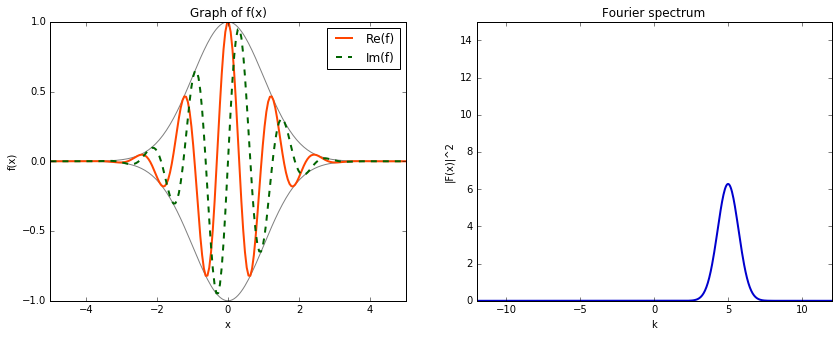

In [12]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, pi, zeros, exp, sqrt
import matplotlib.pyplot as plt

def plot_wavepacket_fourier(q, gamma):
    ## Plot parameters:
    xmin, xmax = -5., 5.
    fmin, fmax = -1., 1.
    kmin, kmax = -12., 12.
    Fsqmin, Fsqmax = 0, 15
    nx, nk = 200, 500
    arrowdx, arrowy, bardy = 2, 2, 0.2
    col0, col1a, col1b, col2 = "grey", "orangered", "darkgreen", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    x = linspace(xmin, xmax, nx)
    f_env = exp(-gamma * x * x)
    f = exp(1j * q * x) * f_env
    plt.plot(x, f_env, '-', linewidth=1, color=col0)   # Plot envelope (in same graph)
    plt.plot(x,-f_env, '-', linewidth=1, color=col0)
    plt.plot(x, f.real, '-',  linewidth=2, color=col1a, label='Re(f)') # Plot the real part of f(x)
    plt.plot(x, f.imag, '--', linewidth=2, color=col1b, label='Im(f)') # Plot imaginary part (in same graph)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Graph of f(x)')
    plt.xlim(xmin, xmax)
    plt.ylim(fmin, fmax)
    plt.legend(loc="upper right")
    
    ## Plot the Fourier spectrum (using exact formula)
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = sqrt(pi/gamma) * exp(-0.25*(k-q)**2/gamma)
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)
    plt.xlabel('k')
    plt.ylabel('|F(x)|^2')
    plt.title('Fourier spectrum')
    plt.xlim(kmin, kmax)
    plt.ylim(Fsqmin, Fsqmax)

interact(plot_wavepacket_fourier,
         q   = FloatSlider(min=-10.0, max=10.0, step=0.1, value=5.0, description='q'),
         gamma = FloatSlider(min=0.1,  max=2.0, step=0.05, value=0.5, description='gamma'));

## The delta function<a name="delta_function"></a>

What happens when we feed the Fourier relations into one another?  Plugging the Fourier transform into the inverse Fourier transform, we get

$$\begin{align}f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx} F(k) \\
&= \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx} \int_{-\infty}^\infty dx' e^{-ikx'} f(x')\\
&= \int_{-\infty}^\infty dx' \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx}  e^{-ikx'} f(x')\\
&= \int_{-\infty}^\infty  dx' \; \delta(x-x')\, f(x'),\end{align}$$

In the last step, we have introduced

$$\delta(x-x') = \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ik(x-x')},$$

which is called the **delta function**.  According to the above equations, the delta function acts as a kind of filter: when we multiply it by any function $f(x')$ and integrate over $x'$, the result is the value of that function at a particular point $x$.

But here's a problem: the above integral definition of the delta function is non-convergent; in particular, the integrand does not vanish at $\pm \infty$.  We can get around this by thinking of the delta function as a limiting case of a convergent integral.  Specifically, let's take

$$\delta(x-x') = \lim_{\gamma \rightarrow 0} \, \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ik(x-x')} \, e^{-\gamma k^2}.$$

For $\gamma \rightarrow 0$, the "regulator" $\exp(-\gamma k^2)$ which we have inserted into the integrand goes to one, so that the integrand goes back to what we had before; on the other hand, for $\gamma > 0$ the regulator ensures that the integrand vanishes at the end-points so that the integral is well-defined.  But the expression on the right is the [Fourier transform for a Gaussian wave-packet, which was discussed above](#gaussian_FT).  Using that result, we get

$$\delta(x-x') = \lim_{\gamma \rightarrow 0} \; \frac{1}{\sqrt{4\pi\gamma}} \, e^{-\frac{(x-x')^2}{4\gamma}}.$$

This is a [Gaussian function](02_integrals.ipynb#gaussian_integral), of width $\sqrt{2\gamma}$ and area $1$.  Hence, the delta function can be regarded as the limit of a Gaussian function as its width goes to zero while keeping the area under the curve fixed at unity (which means the height of the peak goes to infinity).

The most important feature of the delta function is it acts as a "filter". Whenever it shows up in an integral, it picks out the value of the rest of the integrand evaluated where the delta function is centered:

$$\int_{-\infty}^\infty  dx \; \delta(x-x_0)\, f(x) = f(x_0).$$

Intuitively, we can understand this behavior from the above definition of the delta function as the zero-width limit of a Gaussian.  When we multiply a function $f(x)$ with a narrow Gaussian centered at $x_0$, the product will approach zero almost everywhere, because the Gaussian goes to zero.  The product is non-zero only in the vicinity of $x = x_0$, where the Gaussian peaks. And because the area under the delta function is unity, integrating that product over all $x$ simply gives the value of the other function at the point $x_0$.

## Multi-dimensional Fourier transforms<a name="multidim"></a>

When studying problems such as wave propagation, we will often have to deal with Fourier transforms acting on several variables simultaneously.  This is conceptually straightforward.  For a function $f(x_1, x_2, \dots, x_d)$ which depends on $d$ independent spatial coordinates $x_1, x_2, \dots x_d$, we can simply perform a Fourier transform on each coordinate individually:

$$F(k_1, k_2, \dots, k_d) = \int_{-\infty}^\infty dx_1\; e^{-ik_1x_1}\; \int_{-\infty}^\infty dx_2\; e^{-ik_2x_2}\,\cdots\, \int_{-\infty}^\infty dx_d\; e^{-ik_d x_d}\, f(x_1,x_2, \dots,x_N)$$

Note that each coordinate gets Fourier-transformed into its own independent $k$ variable, so that the result is still a function of $d$ independent variables.

We can express this kind of "multi-dimensional Fourier transform" more compactly using vector notation.  Let $\vec{x} = [x_1, x_2, \dots, x_d]$ be a $d$-dimensional coordinate vector.  Then the Fourier-transformed coordinates can be similarly written as $\vec{k} = [k_1, k_2, \dots, k_d]$, and the Fourier transform is

$$F(\vec{k}) = \int_{-\infty}^\infty dx_1\, \int_{-\infty}^\infty dx_2 \cdots \int_{-\infty}^\infty dx_d\; e^{-i\,\vec{k}\,\cdot\,\vec{x}}\, f(\vec{x}),$$

where $\vec{k}\cdot\vec{x} \equiv k_1 x_1 + k_2 x_2 + \cdots + k_d x_d$ is the usual dot product of two vectors.  The inverse Fourier transform is

$$f(\vec{x}) = \int_{-\infty}^\infty \frac{dk_1}{2\pi}\, \int_{-\infty}^\infty \frac{dk_2}{2\pi} \cdots \int_{-\infty}^\infty \frac{dk_d}{2\pi}\; e^{i\,\vec{k}\,\cdot\,\vec{x}}\, F(\vec{k}).$$

The [delta function](#delta_function) can also be defined in $d$-dimensional space, as the Fourier transform of a plane wave:

$$\delta^d(\vec{x}-\vec{x}') = \int_{-\infty}^\infty \frac{dk_1}{2\pi} \int_{-\infty}^\infty \frac{dk_2}{2\pi} \cdots \int_{-\infty}^\infty \frac{dk_d}{2\pi} \, e^{i\vec{k} \cdot \left(\vec{x}-\vec{x}'\right)}.$$

Note that $\delta^d$ has the dimensions of $[x]^{-d}$.  The multi-dimensional delta function has a "filtering" property similar to the [one-dimensional delta function](#delta_function). For any $f(x_1,\dots,x_d)$,

$$\int_{-\infty}^\infty dx_1 \cdots \int_{-\infty}^\infty dx_d \; \delta^d(\vec{x}-\vec{x}') \, f(\vec{x}) = f(\vec{x}').$$

If we have a mix of spatial and temporal coordinates, then the [usual sign conventions](#fourier_time) apply to each individual coordinate.  For example, if $f(x,t)$ is a function of one spatial coordinate and one temporal coordinate, then the Fourier relations are

$$\begin{align}F(k, \omega) &= \int_{-\infty}^\infty dx\; \int_{-\infty}^\infty dt\; e^{-i(kx-\omega t)}\; f(x,t) \\ f(x, t) &= \int_{-\infty}^\infty \frac{dk}{2\pi}\; \int_{-\infty}^\infty \frac{d\omega}{2\pi}\; e^{i(kx-\omega t)}\; F(k,\omega).\end{align}$$


## Exercises<a name="exercises"></a>

<ol>
<li>
Find the relationship between the coefficients $\{\alpha_n, \beta_m\}$ in the sine/cosine Fourier series and the coefficients $f_n$ in the complex exponential Fourier series:$$\begin{aligned}f(t) &= \sum_{n=1}^\infty \alpha_n \sin\left(\frac{2\pi n x}{a}\right) + \sum_{m=0}^\infty \beta_m \cos\left(\frac{2 \pi m x}{a}\right) \\ &= \sum_{n=-\infty}^\infty f_n \exp\left(\frac{2\pi i n x}{a}\right).\end{aligned}$$
</li><li>
Consider the triangular wave$$f(x) = \left\{\begin{array}{rr}- x, &-a/2 \le x < 0, \\ x, & 0 \le x < a/2\end{array}\right.$$ 
<ol>
<li>Derive the Fourier series expansion.</li>
<li>In the incomplete Python program below, write the necessary code for plotting this Fourier series.</li></ol>
</li><li>
Prove the properties of the Fourier transform listed in the [Basic Properties](#basic_props) section.
</li><li>
Find the Fourier transform of $f(x) = \sin(\kappa x)/x.$
</li><li>
Prove that if $f(x)$ is a real function, then its Fourier transform satisfies $F(k) = F(-k)^*$.
</li>
</ol>

The incomplete Python program for Problem 2 is shown below:

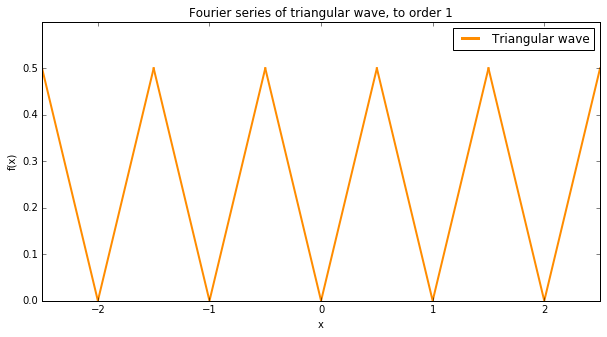

In [22]:
%matplotlib inline
from ipywidgets import interact, IntSlider, FloatSlider
from numpy import *
import matplotlib.pyplot as plt

## Plot a triangular wave of period 'a', as well as
## the Fourier series up to order 'N'.
def plot_triangular_wave_series(N, a):
    np = 2                                # Number of periods to plot on each side of x = 0
    xmin, xmax = (-np-0.5)*a, (np+0.5)*a  # x-axis limits of the plot
    ymin, ymax = 0.0, 0.6*a               # y-axis limits of the plot
    nx = 600                              # Number of x-points in the Fourier series plot
    col1, col2 = "darkorange", "mediumblue"

    plt.figure(figsize=(10,5))
    ## Plot the triangular wave
    plt.plot([], [], linewidth=3, color=col1, label="Triangular wave")
    for n in range(-np, np+1):
        x = array([-0.5*a, 0, 0.5*a])
        y = array([0.5*a, 0, 0.5*a])
        plt.plot(x-n*a, y, linewidth=2, color=col1)
        
    ## Plot the Fourier series approximant.
    x = linspace(xmin, xmax, nx)
    f = zeros(nx)
    ############### [[ Code for calculating f goes here ]] ###############

    ## plt.plot(x, f, linewidth=1, color=col2, label="Series")
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Fourier series of triangular wave, to order {}'.format(N)) 
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.legend(loc="upper right")

interact(plot_triangular_wave_series,
         N = IntSlider(min=1, max=25, step=1, value=1, description='n_max'),
         a = FloatSlider(min=0.5, max=4.0, step=0.1, value=1.0, description='a'));